# **Forest Fire Detection Using Convolutional Neural Network**

---



Setting path

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


Importing necessary libraries

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

Making saperate datasets for training and testing

In [3]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/ForestFireDetectionSystem/Data-Set/TrainingandValidation',
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/ForestFireDetectionSystem/Data-Set/Testing',
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [4]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

Model Building

In [5]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

Compiling the model

In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Fitting the model

In [7]:
r = model.fit(train_dataset,
         epochs = 10,
         validation_data = test_dataset)

Epoch 1/10
58/58 [==============================] - 274s 5s/step - loss: 0.3181 - accuracy: 0.8728 - val_loss: 0.2771 - val_accuracy: 0.9118
Epoch 2/10
58/58 [==============================] - 82s 1s/step - loss: 0.1515 - accuracy: 0.9552 - val_loss: 0.5165 - val_accuracy: 0.8235
Epoch 3/10
58/58 [==============================] - 83s 1s/step - loss: 0.1692 - accuracy: 0.9487 - val_loss: 0.3307 - val_accuracy: 0.8382
Epoch 4/10
58/58 [==============================] - 80s 1s/step - loss: 0.1130 - accuracy: 0.9629 - val_loss: 0.2742 - val_accuracy: 0.8824
Epoch 5/10
58/58 [==============================] - 81s 1s/step - loss: 0.0891 - accuracy: 0.9689 - val_loss: 0.4768 - val_accuracy: 0.8529
Epoch 6/10
58/58 [==============================] - 81s 1s/step - loss: 0.0817 - accuracy: 0.9738 - val_loss: 0.1471 - val_accuracy: 0.9265
Epoch 7/10
58/58 [==============================] - 81s 1s/step - loss: 0.0825 - accuracy: 0.9749 - val_loss: 0.1306 - val_accuracy: 0.9559
Epoch 8/10
58/58 [=

Predicting on Test Dataset

In [8]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

3/3 [==============================] - 1s 224ms/step


In [9]:
predictions

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [10]:
print(len(predictions))

68


Plotting loss per iteration

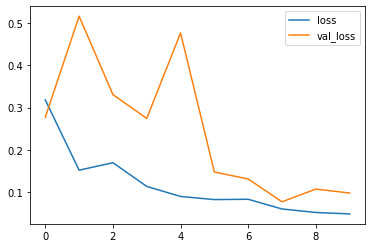

In [11]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

Plotting accuracy per iteration

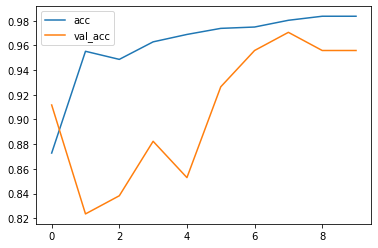

In [12]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Making a function to see any image from dataset with predicted label

In [13]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

1/1 [==============================] - 0s 103ms/step
[[0.]]


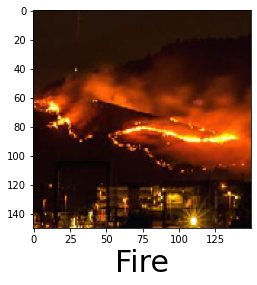

In [14]:
predictImage("/content/drive/MyDrive/Colab Notebooks/ForestFireDetectionSystem/Data-Set/Testing/fire/abc182.jpg")

1/1 [==============================] - 0s 38ms/step
[[0.]]


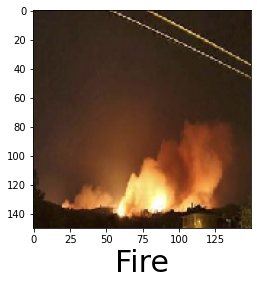

In [15]:
predictImage('/content/drive/MyDrive/Colab Notebooks/ForestFireDetectionSystem/Data-Set/Testing/fire/abc190.jpg')

1/1 [==============================] - 0s 33ms/step
[[1.]]


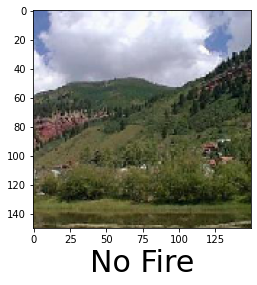

In [16]:
predictImage('/content/drive/MyDrive/Colab Notebooks/ForestFireDetectionSystem/Data-Set/Testing/nofire/abc346.jpg')

1/1 [==============================] - 0s 34ms/step
[[1.]]


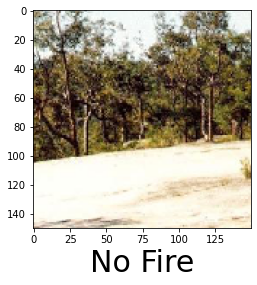

In [17]:
predictImage('/content/drive/MyDrive/Colab Notebooks/ForestFireDetectionSystem/Data-Set/Testing/nofire/abc361.jpg')

1/1 [==============================] - 0s 40ms/step
[[0.]]


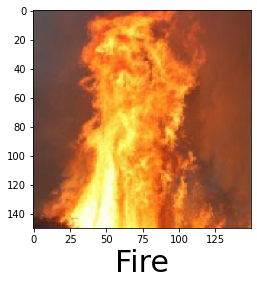

In [18]:
predictImage('/content/drive/MyDrive/Colab Notebooks/ForestFireDetectionSystem/Data-Set/TrainingandValidation/fire/abc011.jpg')

1/1 [==============================] - 0s 35ms/step
[[0.]]


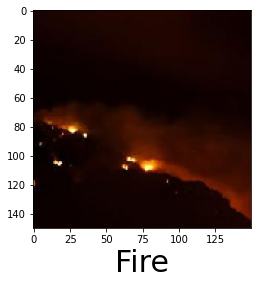

In [19]:
predictImage('/content/drive/MyDrive/Colab Notebooks/ForestFireDetectionSystem/Data-Set/Testing/fire/abc172.jpg')

1/1 [==============================] - 0s 35ms/step
[[4.831297e-08]]


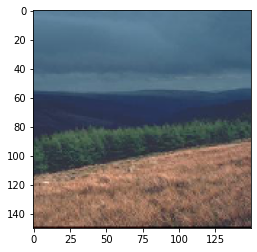

In [20]:
predictImage('/content/drive/MyDrive/Colab Notebooks/ForestFireDetectionSystem/Data-Set/Testing/nofire/abc341.jpg')



-----

